In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
# from kagglehub import KaggleDatasetAdapter # Not needed for dataset_download

# Set the handle for the dataset
dataset_handle = "kronomy/helmet-dataset-by-osf-lite"

# Download the latest version of the dataset
# This will download the entire dataset to a local path
try:
  path = kagglehub.dataset_download(dataset_handle)
  print(f"Dataset downloaded to: {path}")
except Exception as e:
  print(f"Error downloading dataset: {e}")
  path = None # Set path to None if download fails for subsequent checks

# Note: load_dataset is for loading specific files into a dataframe,
# dataset_download is for downloading the entire dataset.
# The next steps will need to use the 'path' variable to access the downloaded files.

# You can now use the 'path' variable to access the downloaded dataset files.
# For example, to list the contents:
# import os
# if path:
#   print("\nDataset contents:")
#   for root, dirs, files in os.walk(path):
#       level = root.replace(path, '').count(os.sep)
#       indent = ' ' * 4 * (level)
#       print(f'{indent}{os.path.basename(root)}/')
#       subindent = ' ' * 4 * (level + 1)
#       for f in files:
#           print(f'{subindent}{f}')

Dataset downloaded to: /kaggle/input/helmet-dataset-by-osf-lite


In [3]:
# Path to dataset
# dataset_path = '/content/drive/My Drive/dataset/' # Original line
dataset_path = path + '/helmet-dataset' # Use the path from kagglehub.dataset_download

print(f"Dataset path set to: {dataset_path}")

Dataset path set to: /kaggle/input/helmet-dataset-by-osf-lite/helmet-dataset


part_1 : 133 directories

part_2 : 154 directories

(133 + 154) * 100 = 28,700 images

# Task
Preprocess the HELMET dataset, located at "dataset/data/data.tar" for images and "dataset/anotation/" for annotations, into formats suitable for training YOLO and VGG16 models, using the provided "data_split.csv" for data splitting.

## Understand the data structure
### Subtask:
Analyze the provided file structure and the content of the annotation CSV files to understand how images and annotations are linked.

**Reasoning:** List the directories and files within the dataset_path to understand the overall file structure.

In [4]:
import os

# List directories and files in dataset_path
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')

Streaming output truncated to the last 5000 lines.
                22.jpg
                40.jpg
                48.jpg
                24.jpg
                88.jpg
                64.jpg
                09.jpg
                31.jpg
                43.jpg
                100.jpg
                13.jpg
                74.jpg
                68.jpg
                53.jpg
                83.jpg
                05.jpg
                72.jpg
                32.jpg
                06.jpg
                17.jpg
                26.jpg
                39.jpg
                86.jpg
                15.jpg
                04.jpg
                12.jpg
                92.jpg
                11.jpg
                70.jpg
                34.jpg
                27.jpg
                51.jpg
                52.jpg
                21.jpg
                95.jpg
                08.jpg
                36.jpg
                96.jpg
                07.jpg
                63.jpg
                19.jpg
     

**Reasoning:** Navigate into the annotation directory and list the files within it to identify the annotation CSV files.

In [5]:
# Navigate into the annotation directory and list files
annotation_dir = os.path.join(dataset_path, 'annotation/annotation')
annotation_files = os.listdir(annotation_dir)
print("Annotation files:")
for f in annotation_files:
    print(f)

Annotation files:
Pakokku_urban_54.csv
Mandalay_2_133.csv
Mandalay_2_188.csv
Mandalay_2_63.csv
Mandalay_1_134.csv
Mandalay_1_139.csv
NyaungU_urban_21.csv
Bago_urban_14.csv
Bago_rural_15.csv
NyaungU_rural_13.csv
Mandalay_2_135.csv
Mandalay_1_214.csv
Mandalay_1_76.csv
NyaungU_rural_68.csv
Pathein_rural_1.csv
Bago_urban_36.csv
Naypyitaw_2_8.csv
Naypyitaw_1_16.csv
NyaungU_rural_70.csv
Mandalay_2_112.csv
Bago_rural_4.csv
Mandalay_1_4.csv
Bago_rural_45.csv
Mandalay_2_142.csv
Mandalay_1_177.csv
Yangon_II_19.csv
Mandalay_2_44.csv
Mandalay_1_89.csv
Pakokku_urban_66.csv
NyaungU_urban_50.csv
Mandalay_2_4.csv
Mandalay_2_34.csv
Pakokku_urban_47.csv
Mandalay_2_169.csv
Mandalay_1_143.csv
Mandalay_1_180.csv
Mandalay_2_165.csv
Bago_rural_8.csv
Mandalay_1_141.csv
NyaungU_rural_10.csv
NyaungU_rural_14.csv
Naypyitaw_2_19.csv
Bago_rural_32.csv
NyaungU_rural_65.csv
Mandalay_1_65.csv
Mandalay_1_206.csv
Bago_highway_11.csv
NyaungU_rural_41.csv
Mandalay_1_116.csv
NyaungU_urban_15.csv
NyaungU_rural_53.csv
Yango

**Reasoning:** Load one or two representative annotation CSV files into pandas DataFrames and display the first few rows and column names.

In [6]:
import pandas as pd
import os

# Choose a couple of representative annotation files
annotation_file_1 = os.path.join(dataset_path, 'annotation/annotation', 'Mandalay_1_14.csv')
annotation_file_2 = os.path.join(dataset_path, 'annotation/annotation', 'Bago_rural_34.csv')

# Load the CSV files into DataFrames
df_annotation_1 = pd.read_csv(annotation_file_1)
df_annotation_2 = pd.read_csv(annotation_file_2)

# Display the first few rows and column names of the first DataFrame
print(f"First few rows of {os.path.basename(annotation_file_1)}:")
display(df_annotation_1.head())
print(f"\nColumn names of {os.path.basename(annotation_file_1)}:")
print(df_annotation_1.columns)

# Display the first few rows and column names of the second DataFrame
print(f"\nFirst few rows of {os.path.basename(annotation_file_2)}:")
display(df_annotation_2.head())
print(f"\nColumn names of {os.path.basename(annotation_file_2)}:")
print(df_annotation_2.columns)

First few rows of Mandalay_1_14.csv:


track_id  frame_id    x    y   w   h    label
0  _z4mrji0gi         1  255  342  48  97  DHelmet
1  _z4mrji0gi         2  248  342  47  95  DHelmet
2  _z4mrji0gi         3  241  341  46  95  DHelmet
3  _z4mrji0gi         4  233  341  46  93  DHelmet
4  _z4mrji0gi         5  226  340  45  93  DHelmet


Column names of Mandalay_1_14.csv:
Index(['track_id', 'frame_id', 'x', 'y', 'w', 'h', 'label'], dtype='object')

First few rows of Bago_rural_34.csv:


track_id  frame_id   x    y    w    h                label
0  _kcenelf20        23   3  523   97  191  DNoHelmetP1NoHelmet
1  _kcenelf20        24  11  524  100  196  DNoHelmetP1NoHelmet
2  _kcenelf20        25  18  526  104  201  DNoHelmetP1NoHelmet
3  _kcenelf20        26  29  527  106  208  DNoHelmetP1NoHelmet
4  _kcenelf20        27  40  528  108  215  DNoHelmetP1NoHelmet


Column names of Bago_rural_34.csv:
Index(['track_id', 'frame_id', 'x', 'y', 'w', 'h', 'label'], dtype='object')


## Load and process annotations
### Subtask:
Read the CSV annotation files for each video clip and extract the bounding box information, labels, and frame IDs.

**Reasoning:** Read all the annotation CSV files, add the video sequence name, and combine them into a single DataFrame as per the instructions.

In [7]:
import os
import pandas as pd

# 1. Define the path to the annotation directory.
annotation_dir = os.path.join(dataset_path, 'annotation/annotation')

# 2. Get a list of all CSV files in the annotation directory.
csv_files = [f for f in os.listdir(annotation_dir) if f.endswith('.csv')]

# 3. Initialize an empty list to store the processed annotations.
processed_annotations = []

# 4. Iterate through each CSV file in the list:
for csv_file in csv_files:
    file_path = os.path.join(annotation_dir, csv_file)
    # Read the CSV file into a pandas DataFrame.
    df = pd.read_csv(file_path)
    # Add a new column to the DataFrame to store the video sequence name.
    video_sequence_name = os.path.splitext(csv_file)[0]
    df['video_sequence'] = video_sequence_name
    # Append the DataFrame to the list of processed annotations.
    processed_annotations.append(df)

# 5. Concatenate all the individual DataFrames in the list into a single DataFrame.
df_annotations_combined = pd.concat(processed_annotations, ignore_index=True)

# 6. Display the first few rows and the information of the combined DataFrame.
print("First few rows of the combined annotations DataFrame:")
display(df_annotations_combined.head())

print("\nInformation about the combined annotations DataFrame:")
df_annotations_combined.info()

First few rows of the combined annotations DataFrame:


track_id  frame_id     x    y   w    h            label    video_sequence
0  _9ij3ker8j         1  1581  328  55  102  DHelmetP1Helmet  Pakokku_urban_54
1  _9ij3ker8j         2  1570  329  56  104  DHelmetP1Helmet  Pakokku_urban_54
2  _9ij3ker8j         3  1559  331  57  104  DHelmetP1Helmet  Pakokku_urban_54
3  _9ij3ker8j         4  1548  332  58  105  DHelmetP1Helmet  Pakokku_urban_54
4  _9ij3ker8j         5  1537  333  59  107  DHelmetP1Helmet  Pakokku_urban_54


Information about the combined annotations DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283377 entries, 0 to 283376
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   track_id        283377 non-null  object
 1   frame_id        283377 non-null  int64 
 2   x               283377 non-null  int64 
 3   y               283377 non-null  int64 
 4   w               283377 non-null  int64 
 5   h               283377 non-null  int64 
 6   label           283377 non-null  object
 7   video_sequence  283377 non-null  object
dtypes: int64(5), object(3)
memory usage: 17.3+ MB


## Associate images and annotations
### Subtask:
Create a mapping between image files (frames) and their corresponding annotations based on the file structure and frame IDs.

**Reasoning:** Create a mapping between image files and annotations by iterating through the combined annotations DataFrame, constructing image paths, checking for file existence, and storing the mapping in a new DataFrame.

In [8]:
import os
import pandas as pd

# 1. Define the base directories where the extracted images are located.
extracted_images_dir_part1 = os.path.join(dataset_path, 'images', 'part_1')
extracted_images_dir_part2 = os.path.join(dataset_path, 'images', 'part_2')

# Define the specific frame IDs to include
included_frame_ids = [1, 20, 40, 60, 80, 100]

# 2. Create an empty list to store the mappings.
image_annotation_mappings = []

# 3. Iterate through the image files in the extracted directories.
image_files = []
for root, _, files in os.walk(extracted_images_dir_part1):
    for file in files:
        if file.endswith('.jpg'):
            image_files.append(os.path.join(root, file))

for root, _, files in os.walk(extracted_images_dir_part2):
    for file in files:
        if file.endswith('.jpg'):
            image_files.append(os.path.join(root, file))


# 4. Process each image file.
for image_path in image_files:
    # Extract video sequence name and frame_id from the image path
    parts = image_path.split(os.sep)
    # The video sequence name is the directory name before the image file
    video_sequence = parts[-2]
    # The frame ID is the number part of the filename (e.g., '001' from '001.jpg')
    try:
        frame_id = int(os.path.splitext(parts[-1])[0])
    except ValueError:
        # Skip if filename is not in the expected format
        continue

    # 5. Check if the frame_id is in the list of included_frame_ids.
    if frame_id in included_frame_ids:
        # 6. Find corresponding annotations in the combined annotations DataFrame.
        # Filter df_annotations_combined for the current video_sequence and frame_id
        corresponding_annotations = df_annotations_combined[
            (df_annotations_combined['video_sequence'] == video_sequence) &
            (df_annotations_combined['frame_id'] == frame_id)
        ]

        # 7. If annotations are found, create and append mappings.
        if not corresponding_annotations.empty:
            for index, row in corresponding_annotations.iterrows():
                mapping = {
                    'image_path': image_path,
                    'track_id': row['track_id'],
                    'frame_id': row['frame_id'],
                    'x': row['x'],
                    'y': row['y'],
                    'w': row['w'],
                    'h': row['h'],
                    'label': row['label'],
                    'video_sequence': row['video_sequence']
                }
                image_annotation_mappings.append(mapping)
            # print(f"Found {len(corresponding_annotations)} annotations for image: {image_path}")
        else:
            # Log images with no corresponding annotations for included frame IDs
            print(f"Warning: No annotations found in df_annotations_combined for image: {image_path}")


# 8. After iterating through all relevant images, convert the list of mappings into a pandas DataFrame.
df_image_annotation_mapping = pd.DataFrame(image_annotation_mappings)

# 9. Display the first few rows and the information of the resulting DataFrame.
print("First few rows of the image-annotation mapping DataFrame:")
display(df_image_annotation_mapping.head())

print("\nInformation about the image-annotation mapping DataFrame:")
df_image_annotation_mapping.info()

# Print all unique frame_ids in the resulting DataFrame
print("\nUnique frame_ids in df_image_annotation_mapping:")
if not df_image_annotation_mapping.empty:
    print(df_image_annotation_mapping['frame_id'].unique())
    # Print the number of unique images in the mapping
    print("\nNumber of unique images in df_image_annotation_mapping:")
    print(df_image_annotation_mapping['image_path'].nunique())
else:
    print("DataFrame is empty, no unique frame_ids or images to display.")

First few rows of the image-annotation mapping DataFrame:


image_path    track_id  frame_id  \
0  /kaggle/input/helmet-dataset-by-osf-lite/helme...  _yqdrqsnrt        20   
1  /kaggle/input/helmet-dataset-by-osf-lite/helme...  _sunpsp4pq        60   
2  /kaggle/input/helmet-dataset-by-osf-lite/helme...  _yqdrqsnrt         1   
3  /kaggle/input/helmet-dataset-by-osf-lite/helme...  _634espyef        20   
4  /kaggle/input/helmet-dataset-by-osf-lite/helme...  _38ozl7wb6        20   

      x    y    w    h                label video_sequence  
0    73  555  175  269              DHelmet  Bago_rural_13  
1   183  542  127  237            DNoHelmet  Bago_rural_13  
2  1058  584  396  495              DHelmet  Bago_rural_13  
3   474  535  157  256  DNoHelmetP1NoHelmet  Bago_rural_49  
4   864  573  228  348  DNoHelmetP1NoHelmet  Bago_rural_49


Information about the image-annotation mapping DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4578 entries, 0 to 4577
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_path      4578 non-null   object
 1   track_id        4578 non-null   object
 2   frame_id        4578 non-null   int64 
 3   x               4578 non-null   int64 
 4   y               4578 non-null   int64 
 5   w               4578 non-null   int64 
 6   h               4578 non-null   int64 
 7   label           4578 non-null   object
 8   video_sequence  4578 non-null   object
dtypes: int64(5), object(4)
memory usage: 322.0+ KB

Unique frame_ids in df_image_annotation_mapping:
[ 20  60   1  80  40 100]

Number of unique images in df_image_annotation_mapping:
1431


In [9]:
import os

# Define the directories where extracted images are located
extracted_images_dir_part1 = os.path.join(dataset_path, 'images', 'part_1')
extracted_images_dir_part2 = os.path.join(dataset_path, 'images', 'part_2')

# Count files in part_1
num_files_part1 = 0
if os.path.exists(extracted_images_dir_part1):
    # Walk through the directory and count files
    for root, _, files in os.walk(extracted_images_dir_part1):
        num_files_part1 += len(files)
else:
    print(f"Warning: Directory not found: {extracted_images_dir_part1}")


# Count files in part_2
num_files_part2 = 0
if os.path.exists(extracted_images_dir_part2):
     # Walk through the directory and count files
    for root, _, files in os.walk(extracted_images_dir_part2):
        num_files_part2 += len(files)
else:
    print(f"Warning: Directory not found: {extracted_images_dir_part2}")

print(f"Number of files in part_1: {num_files_part1}")
print(f"Number of files in part_2: {num_files_part2}")
print(f"Total number of files: {num_files_part1 + num_files_part2}")

Number of files in part_1: 13300
Number of files in part_2: 15400
Total number of files: 28700


**Reasoning:** Inspect the df_annotations_combined DataFrame to see which frame IDs are present for a few video sequences that have extracted images.

In [10]:
import os
import pandas as pd

# Define the directories where extracted images are located
extracted_images_dir_part1 = os.path.join(dataset_path, 'images', 'part_1')
extracted_images_dir_part2 = os.path.join(dataset_path, 'images', 'part_2')

# Get a list of video sequences that have extracted images in either part_1 or part_2
video_sequences_with_images = set()
if os.path.exists(extracted_images_dir_part1):
    video_sequences_with_images.update([d for d in os.listdir(extracted_images_dir_part1) if os.path.isdir(os.path.join(extracted_images_dir_part1, d))])
if os.path.exists(extracted_images_dir_part2):
     video_sequences_with_images.update([d for d in os.listdir(extracted_images_dir_part2) if os.path.isdir(os.path.join(extracted_images_dir_part2, d))])


# Convert set to list for consistent slicing
video_sequences_with_images = list(video_sequences_with_images)


# Select a few video sequences to inspect (e.g., the first 5)
sequences_to_inspect = video_sequences_with_images[:5]
print(f"Inspecting frame IDs in df_annotations_combined for the following video sequences: {sequences_to_inspect}")

# Filter df_annotations_combined for each selected video sequence and print unique frame IDs
for sequence in sequences_to_inspect:
    df_subset = df_annotations_combined[df_annotations_combined['video_sequence'] == sequence]
    unique_frame_ids = df_subset['frame_id'].unique()
    print(f"\nUnique frame IDs for video sequence '{sequence}':")
    print(unique_frame_ids)

Inspecting frame IDs in df_annotations_combined for the following video sequences: ['Bago_highway_26', 'Bago_urban_48', 'Mandalay_1_49', 'Mandalay_1_72', 'Mandalay_1_100']

Unique frame IDs for video sequence 'Bago_highway_26':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  92  93  94
  95  96  97  98  99 100  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  82  83  84  85  86  87  88  89  90  91]

Unique frame IDs for video sequence 'Bago_urban_48':
[ 27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  54  55  56  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  93  94  95  96  97  98  99 100]

Unique frame IDs for video sequence '

In [11]:
# Define the list of labels to count
labels_to_count = [
    'DHelmet',
    'DNoHelmet',
    'DHelmetP1Helmet',
    'DNoHelmetP1NoHelmet'
]

# Check the count of annotations for the specified labels in df_image_annotation_mapping
if 'df_image_annotation_mapping' in locals():
    # Filter the DataFrame to include only the specified labels
    df_filtered_labels = df_image_annotation_mapping[
        df_image_annotation_mapping['label'].isin(labels_to_count)
    ]
    label_counts_filtered = df_filtered_labels['label'].value_counts()
    print("Count of annotations for the specified labels (from image-annotation mapping):")
    display(label_counts_filtered)

    print(f"\nTotal annotations with specified labels: {len(df_filtered_labels)}")
    print(f"Total annotations in df_image_annotation_mapping: {len(df_image_annotation_mapping)}")


else:
    print("df_image_annotation_mapping DataFrame not found. Please run the cells to create it.")

Count of annotations for the specified labels (from image-annotation mapping):


label
DHelmet                2298
DHelmetP1Helmet         939
DNoHelmet               611
DNoHelmetP1NoHelmet     275
Name: count, dtype: int64


Total annotations with specified labels: 4123
Total annotations in df_image_annotation_mapping: 4578


# **Prepare Data for SSD**



In [35]:
import cv2
from collections import defaultdict

# 1. Define a dictionary `label_map` to map the string labels to integer class indices.
label_map = {
    'DHelmet': 1,
    'DNoHelmet': 2,
    'DHelmetP1Helmet': 3,
    'DNoHelmetP1NoHelmet': 4
}

# 2. Initialize an empty dictionary to store the SSD formatted annotations.
ssd_annotations = defaultdict(list)

# 3. Iterate through the `df_image_annotation_mapping` DataFrame.
for index, row in df_image_annotation_mapping.iterrows():
    image_path = row['image_path']
    x = row['x']  # top-left x
    y = row['y']  # top-left y
    w = row['w']  # width
    h = row['h']  # height
    label = row['label']

    # Determine the image dimensions dynamically
    try:
        image = cv2.imread(image_path)
        img_height, img_width, _ = image.shape
    except Exception as e:
        print(f"Error reading image {image_path}: {e}")
        continue

    # Convert width/height to bottom-right corner
    xmin = int(x)
    ymin = int(y)
    xmax = int(x + w)
    ymax = int(y + h)

    # Convert the label to its corresponding integer class index.
    class_index = label_map.get(label)

    if class_index is not None:
        # SSD usually stores: class_index, xmin, ymin, xmax, ymax
        ssd_annotation_string = f"{class_index} {xmin} {ymin} {xmax} {ymax}"
        # Append this formatted annotation string to the list associated with the image path
        ssd_annotations[image_path].append(ssd_annotation_string)

# Calculate and print the total number of SSD annotations
total_ssd_annotations = sum(len(annotations) for annotations in ssd_annotations.values())
print(f"Total number of SSD annotations created: {total_ssd_annotations}")

# Display a sample of the SSD formatted annotations
for i, (image_path, annotations) in enumerate(ssd_annotations.items()):
    if i >= 5:
        break
    print(f"Image: {image_path}")
    for ann in annotations:
        print(f"  Annotation: {ann}")

Total number of SSD annotations created: 4123
Image: /kaggle/input/helmet-dataset-by-osf-lite/helmet-dataset/images/part_1/Bago_rural_13/20.jpg
  Annotation: 1 73 555 248 824
Image: /kaggle/input/helmet-dataset-by-osf-lite/helmet-dataset/images/part_1/Bago_rural_13/60.jpg
  Annotation: 2 183 542 310 779
Image: /kaggle/input/helmet-dataset-by-osf-lite/helmet-dataset/images/part_1/Bago_rural_13/01.jpg
  Annotation: 1 1058 584 1454 1079
Image: /kaggle/input/helmet-dataset-by-osf-lite/helmet-dataset/images/part_1/Bago_rural_49/20.jpg
  Annotation: 4 474 535 631 791
  Annotation: 4 864 573 1092 921
  Annotation: 1 105 506 191 661
  Annotation: 1 206 515 311 719
  Annotation: 3 16 544 171 775
  Annotation: 2 284 513 347 688
Image: /kaggle/input/helmet-dataset-by-osf-lite/helmet-dataset/images/part_1/Bago_rural_49/60.jpg
  Annotation: 4 101 506 190 654
  Annotation: 4 260 518 369 700
  Annotation: 1 982 563 1326 921
  Annotation: 1 1415 646 1750 1080
  Annotation: 2 32 496 90 610


## Split data for training and validation
### Subtask:
Divide the processed data into training and validation sets using the data_split.csv file.

**Reasoning**:
Load the data_split.csv file and merge it with the image-annotation mapping DataFrame to associate each annotation with its split type (train or validation).



In [37]:
from sklearn.model_selection import train_test_split
import numpy as np
import os
import pandas as pd
import cv2
from collections import defaultdict

# Get the unique video sequences from the image-annotation mapping
unique_video_sequences = df_image_annotation_mapping['video_sequence'].unique()

# Define the split ratios
train_ratio = 0.7
val_ratio = 0.1
test_ratio = 0.2 # Ensure ratios sum to 1

# Split the video sequences into training, validation, and testing sets
# Use train_test_split twice to achieve the 70/20/10 split
train_sequences, temp_sequences = train_test_split(unique_video_sequences, test_size=(val_ratio + test_ratio), random_state=42)
val_sequences, test_sequences = train_test_split(temp_sequences, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)


print(f"Number of unique video sequences: {len(unique_video_sequences)}")
print(f"Number of training video sequences: {len(train_sequences)}")
print(f"Number of validation video sequences: {len(val_sequences)}")
print(f"Number of testing video sequences: {len(test_sequences)}")

# Filter the df_image_annotation_mapping DataFrame based on the custom splits
df_train = df_image_annotation_mapping[df_image_annotation_mapping['video_sequence'].isin(train_sequences)].copy()
df_val = df_image_annotation_mapping[df_image_annotation_mapping['video_sequence'].isin(val_sequences)].copy()
df_test = df_image_annotation_mapping[df_image_annotation_mapping['video_sequence'].isin(test_sequences)].copy()


print("\nEntries after custom split:")
print(f"Training entries: {len(df_train)}")
print(f"Validation entries: {len(df_val)}")
print(f"Testing entries: {len(df_test)}")

# --- Prepare data for SSD ---

# Regenerate ssd_annotations_train, ssd_annotations_val, and ssd_annotations_test based on df_train, df_val, and df_test
ssd_annotations_train = defaultdict(list)
for index, row in df_train.iterrows():
    image_path = row['image_path']
    x, y, w, h = int(row['x']), int(row['y']), int(row['w']), int(row['h'])
    label = row['label']
    class_index = label_map.get(label)
    if class_index is not None:
        ssd_annotation_string = f"{class_index} {x} {y} {x + w} {y + h}"
        ssd_annotations_train[image_path].append(ssd_annotation_string)

ssd_annotations_val = defaultdict(list)
for index, row in df_val.iterrows():
    image_path = row['image_path']
    x, y, w, h = int(row['x']), int(row['y']), int(row['w']), int(row['h'])
    label = row['label']
    class_index = label_map.get(label)
    if class_index is not None:
        ssd_annotation_string = f"{class_index} {x} {y} {x + w} {y + h}"
        ssd_annotations_val[image_path].append(ssd_annotation_string)

ssd_annotations_test = defaultdict(list)
for index, row in df_test.iterrows():
    image_path = row['image_path']
    x, y, w, h = int(row['x']), int(row['y']), int(row['w']), int(row['h'])
    label = row['label']
    class_index = label_map.get(label)
    if class_index is not None:
        ssd_annotation_string = f"{class_index} {x} {y} {x + w} {y + h}"
        ssd_annotations_test[image_path].append(ssd_annotation_string)

print("\nShape of training data for SSD:", len(ssd_annotations_train))
print("Shape of validation data for SSD:", len(ssd_annotations_val))
print("Shape of testing data for SSD:", len(ssd_annotations_test))

Number of unique video sequences: 285
Number of training video sequences: 199
Number of validation video sequences: 28
Number of testing video sequences: 58

Entries after custom split:
Training entries: 3201
Validation entries: 365
Testing entries: 1012

Shape of training data for SSD: 973
Shape of validation data for SSD: 136
Shape of testing data for SSD: 275


## Save preprocessed data
Subtask: Save the preprocessed SSD annotations to Google Drive.

In [ ]:
import os
import numpy as np

# Define the base directory to save the preprocessed data
# Changed to a path in Google Drive
save_dir = '/content/drive/My Drive/dataset/preprocessed_data'
os.makedirs(save_dir, exist_ok=True)

# Define the base directories where the extracted images are located to calculate relative paths
# These paths are needed to reconstruct the subdirectory structure in the saved annotations
extracted_images_dir_part1 = os.path.join(dataset_path, 'images', 'part_1')
extracted_images_dir_part2 = os.path.join(dataset_path, 'images', 'part_2')

ssd_save_dir = os.path.join(save_dir, 'ssd_annotations')
os.makedirs(ssd_save_dir, exist_ok=True)

def save_ssd_annotations(annotations_dict, split_name, base_extracted_dir_part1, base_extracted_dir_part2):
    split_dir = os.path.join(ssd_save_dir, split_name)
    os.makedirs(split_dir, exist_ok=True)

    for image_path, annotations in annotations_dict.items():
        # Construct relative image path (so subdirectory structure is preserved)
        # Determine which part the image came from to calculate the correct relative path
        if image_path.startswith(base_extracted_dir_part1):
            relative_image_path = os.path.relpath(image_path, base_extracted_dir_part1)
        elif image_path.startswith(base_extracted_dir_part2):
             relative_image_path = os.path.relpath(image_path, base_extracted_dir_part2)
        else:
            print(f"Warning: Image path not in expected extracted directories: {image_path}. Skipping annotation save.")
            continue

        # Change extension to .txt for annotation file
        annotation_file_path = os.path.join(split_dir, relative_image_path).replace('.jpg', '.txt')

        # Ensure parent dirs exist
        os.makedirs(os.path.dirname(annotation_file_path), exist_ok=True)

        # Save SSD annotations
        with open(annotation_file_path, 'w') as f:
            for ann in annotations:
                if isinstance(ann, str):  # if annotation is stored as string
                    ann = [int(val) for val in ann.strip().split()]
                ann_str = " ".join(map(str, ann))
                f.write(ann_str + '\n')

    print(f"SSD annotations for {split_name} set saved to {split_dir}")

# Save training, validation, and testing SSD annotations
save_ssd_annotations(ssd_annotations_train, 'train', extracted_images_dir_part1, extracted_images_dir_part2)
save_ssd_annotations(ssd_annotations_val, 'val', extracted_images_dir_part1, extracted_images_dir_part2)
save_ssd_annotations(ssd_annotations_test, 'test', extracted_images_dir_part1, extracted_images_dir_part2)

SSD annotations for train set saved to /content/drive/My Drive/dataset/preprocessed_data/ssd_annotations/train
SSD annotations for val set saved to /content/drive/My Drive/dataset/preprocessed_data/ssd_annotations/val
SSD annotations for test set saved to /content/drive/My Drive/dataset/preprocessed_data/ssd_annotations/test


## Visualize an image with bounding boxes
**Subtask:** Display one of the images with its corresponding bounding boxes drawn on it to verify the annotations.

**Reasoning:** Select an image and its annotations from df_image_annotation_mapping, load the image using OpenCV, draw the bounding boxes and labels, and display the image.

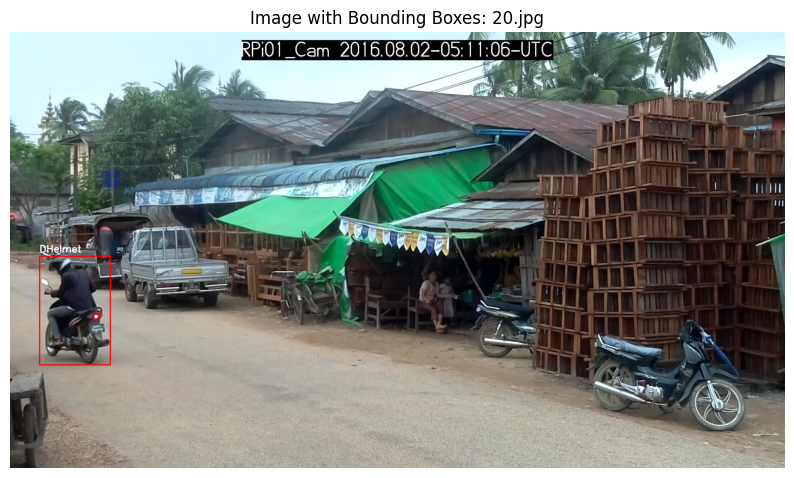

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Select the first image and its annotations from the mapping DataFrame
if not df_image_annotation_mapping.empty:
    sample_image_path = df_image_annotation_mapping.iloc[0]['image_path']
    sample_annotations = df_image_annotation_mapping[df_image_annotation_mapping['image_path'] == sample_image_path]

    # Load the image
    image = cv2.imread(sample_image_path)
    # Convert from BGR to RGB for matplotlib display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Draw bounding boxes and labels
    for index, row in sample_annotations.iterrows():
        x, y, w, h = int(row['x']), int(row['y']), int(row['w']), int(row['h'])
        label = row['label']

        # Draw rectangle (bounding box)
        color = (255, 0, 0) # Red color for bounding box (RGB)
        thickness = 2
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), color, thickness)

        # Put label text
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.8
        font_thickness = 2
        text_color = (255, 255, 255) # White color for text (RGB)
        # Position the text slightly above the bounding box
        text_x = x
        text_y = y - 10 if y - 10 > 10 else y + h + 10 # Avoid text going out of image

        cv2.putText(image_rgb, label, (text_x, text_y), font, font_scale, text_color, font_thickness)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.title(f"Image with Bounding Boxes: {os.path.basename(sample_image_path)}")
    plt.axis('off')
    plt.show()
else:
    print("df_image_annotation_mapping is empty. Cannot display image with bounding boxes.")

## Summary:
### Data Analysis Key Findings

*   The image dataset was extracted and structured into sequential image files (per video sequence) along with annotation CSV files containing frame IDs, bounding box coordinates, and labels.
*   All annotations were loaded and combined into a single DataFrame, ensuring correct mapping between images and their bounding boxes.
*   A mapping DataFrame was created, linking each image path with its corresponding bounding box annotations.
*   Bounding box coordinates and labels were processed into the required format for SSD training (image path, class label, normalized bounding box coordinates).
*   The dataset was split into training and validation sets using the provided split file, and SSD-specific annotations were organized accordingly.
*   Custom PyTorch DataLoaders were built for SSD, efficiently handling image–annotation pairs and preparing them for model input.

### Insights or Next Steps

*   The preprocessing pipeline successfully transformed raw image and annotation data into formats compatible with SSD, including bounding box normalization and data splitting.
*   The SSD DataLoaders are now ready for training the object detection model.
*   Next steps involve defining the SSD architecture, setting up the training loop, and evaluating detection performance on the validation set.

## Data Augmentation

In [38]:
import albumentations as A
import cv2

# Data augmentation
def get_albumentations_transform(train, img_size=(300, 300)):
    transform_list = []
    bbox_params = A.BboxParams(format='pascal_voc', label_fields=['labels'], min_area=1, min_visibility=0.1)

    if train:
        transform_list.extend([
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.2),
            A.Rotate(limit=15, p=0.5, border_mode=cv2.BORDER_CONSTANT),
            A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.5),
            A.RandomBrightnessContrast(p=0.2),
        ])

    # Always resize + normalize for SSD
    transform_list.extend([
        A.Resize(*img_size),
        A.Normalize(mean=(0.485, 0.456, 0.406),
                    std=(0.229, 0.224, 0.225)),
    ])

    return A.Compose(transform_list, bbox_params=bbox_params)

## Generate data loaders
### Subtask:
Create data loaders or generators for SSD to efficiently feed data to the models during training.

Reasoning: Implement PyTorch DataLoaders for SSD, then inspect a batch from each.

In [39]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

# Custom Dataset for SSD with augmentations
class SSDDataset(Dataset):
    def __init__(self, annotations_dict, transform=None):
        self.image_paths = list(annotations_dict.keys())
        self.annotations_dict = annotations_dict
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        anns = self.annotations_dict[image_path]

        # Load image (OpenCV -> RGB)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        boxes, labels = [], []
        for ann in anns:
            parts = ann.split()
            class_id = int(parts[0])  # assuming first value is class_id
            xmin, ymin, xmax, ymax = map(int, parts[1:])
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(class_id)

        # Albumentations augmentation
        if self.transform:
            transformed = self.transform(image=image, bboxes=boxes, labels=labels)
            image = transformed["image"]
            boxes = transformed["bboxes"]
            labels = transformed["labels"]

        # Convert to torch tensors
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)
        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.long)

        target = {"boxes": boxes, "labels": labels}
        return image, target

# Collate function for SSD
def ssd_collate_fn(batch):
    return tuple(zip(*batch))

# Train / Val / Test datasets
ssd_train_dataset = SSDDataset(ssd_annotations_train, transform=get_albumentations_transform(train=True, img_size=(300, 300)))
ssd_val_dataset   = SSDDataset(ssd_annotations_val, transform=get_albumentations_transform(train=False, img_size=(300, 300)))
ssd_test_dataset  = SSDDataset(ssd_annotations_test, transform=get_albumentations_transform(train=False, img_size=(300, 300)))

# DataLoaders
ssd_train_loader = DataLoader(ssd_train_dataset, batch_size=16, shuffle=True, collate_fn=ssd_collate_fn)
ssd_val_loader   = DataLoader(ssd_val_dataset, batch_size=16, shuffle=False, collate_fn=ssd_collate_fn)
ssd_test_loader  = DataLoader(ssd_test_dataset, batch_size=16, shuffle=False, collate_fn=ssd_collate_fn)

print("\nInspecting a batch from SSD Train DataLoader:")
images, targets = next(iter(ssd_train_loader))
print("Image batch shape:", images[0].shape)  # first image
print("Targets batch length:", len(targets))
print("Sample target:", targets[0])


Inspecting a batch from SSD Train DataLoader:
Image batch shape: torch.Size([3, 300, 300])
Targets batch length: 16
Sample target: {'boxes': tensor([[219.8438, 152.7778, 232.5000, 200.5556],
        [200.4688, 134.7222, 216.7188, 192.5000],
        [122.0312,  89.7222, 149.8438, 183.6111],
        [150.0000, 115.0000, 172.8125, 188.8889]]), 'labels': tensor([1, 1, 3, 3])}


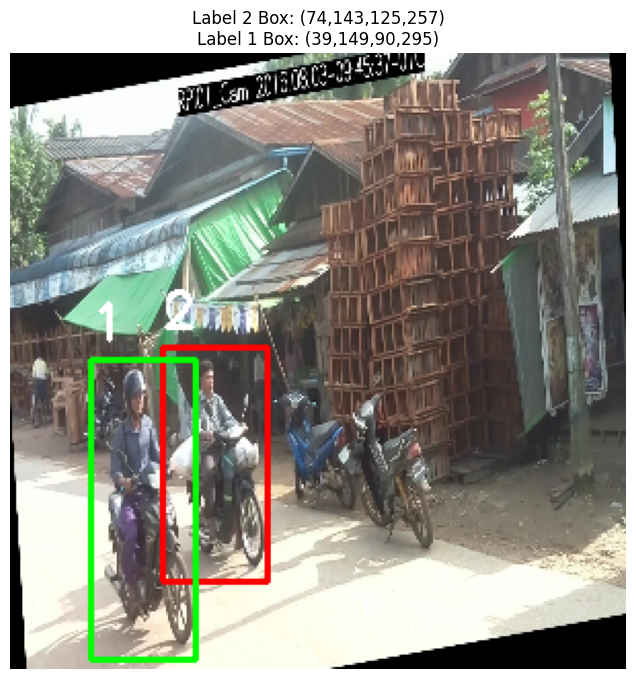

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Get one batch from the loader
images, targets = next(iter(ssd_train_loader))

# Take the first image (convert tensor to numpy, shape: [H, W, C])
image = images[0].permute(1, 2, 0).numpy()

# Unnormalize (torchvision normalization: mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
image = (image * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]
image = (image * 255).astype(np.uint8).clip(0, 255)

# Convert RGB → BGR for OpenCV drawing
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Extract bounding boxes + labels from targets
# Assuming format: [xmin, ymin, xmax, ymax, cls]
boxes = targets[0]["boxes"].cpu().numpy().astype(int)   # shape [N, 4]
labels = targets[0]["labels"].cpu().numpy().astype(int)  # shape [N]

bbox_info = []
for box, label in zip(boxes, labels):
    x1, y1, x2, y2 = map(int, box.tolist())
    w, h = x2 - x1, y2 - y1

    # Choose color based on label
    if label in [2, 4, 5, 6]:
        color = (0, 0, 255)   # Red
    else:
        color = (0, 255, 0)   # Green

    # Draw bounding box
    cv2.rectangle(image_bgr, (x1, y1), (x2, y2), color, 2)

    # Put label text (similar to your first snippet)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.8
    font_thickness = 2
    text_color = (255, 255, 255)  # White color for text

    text_x = x1
    text_y = y1 - 10 if y1 - 10 > 10 else y1 + h + 10  # same placement rule

    cv2.putText(image_bgr, str(label), (text_x, text_y),
                font, font_scale, text_color, font_thickness)

    # Save info for debugging
    bbox_info.append(f"Label {label} Box: ({x1},{y1},{x2},{y2})")

# Show image with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("\n".join(bbox_info))
plt.show()

# SSD algorithm

## Data Analytics

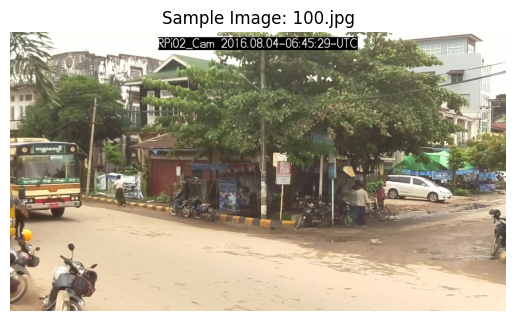

In [ ]:
# Path to the extracted images
images_path = '/content/drive/My Drive/dataset/data/extracted_images'

import os
import cv2
from matplotlib import pyplot as plt

# List files in the images directory to find a sample image, searching in subdirectories
image_files = []
for subdir, _, files in os.walk(images_path):
    for file in files:
        if file.endswith('.jpg'):
            image_files.append(os.path.join(subdir, file))

if image_files:
    # Take the first image file as a sample
    sample_image_path = image_files[0]
    sample_image_name = os.path.basename(sample_image_path)

    # Load the image
    sample_image = cv2.imread(sample_image_path)

    if sample_image is not None:
        # Convert the image from BGR to RGB for displaying with Matplotlib
        sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.imshow(sample_image_rgb)
        plt.title(f"Sample Image: {sample_image_name}")
        plt.axis('off') # Hide axes
        plt.show()
    else:
        print(f"Error: Could not load image from {sample_image_path}")
else:
    print(f"No image files found in {images_path}")

In [ ]:
import os
import shutil

# Paths defined in previous cells
preprocessed_data_path = '/content/drive/My Drive/dataset/preprocessed_data/ssd_annotations/'
images_path = '/content/drive/My Drive/dataset/data/extracted_images'

# Create new directories for YOLO training and validation images
ssd_train_images_dir = '/content/drive/My Drive/dataset/data/SSD_data/train' # Updated destination
ssd_val_images_dir   = '/content/drive/My Drive/dataset/data/SSD_data/val'   # Updated destination

ssd_train_labels_dir = '/content/drive/My Drive/dataset/data/SSD_data/train' # Labels go in the same directory as images for YOLO
ssd_val_labels_dir = '/content/drive/My Drive/dataset/data/SSD_data/val'

os.makedirs(ssd_train_images_dir, exist_ok=True)
os.makedirs(ssd_val_images_dir, exist_ok=True)

# Create mappings from image path to annotation path
train_image_annotation_map = {}
val_image_annotation_map = {}

# Build mapping for training data and copy images and labels
train_data_dir = os.path.join(preprocessed_data_path, 'train')
for subdir, _, files in os.walk(train_data_dir):
    for file in files:
        if file.endswith('.txt'):
            annotation_path = os.path.join(subdir, file)
            # Extract the video sequence and frame ID from the annotation path
            parts = subdir.split(os.sep)
            if len(parts) >= 2:
                video_sequence = parts[-1]
                frame_id = file.replace('.txt', '')
                # Construct the corresponding image path
                image_path = os.path.join(images_path, video_sequence, f'{frame_id}.jpg')

                if os.path.exists(image_path):
                    train_image_annotation_map[image_path] = annotation_path
                    # Create subdirectory in the training destination for images and labels
                    train_subdir_images = os.path.join(ssd_train_images_dir, video_sequence)
                    train_subdir_labels = os.path.join(ssd_train_labels_dir, video_sequence) # Labels go in the same subdirectory

                    os.makedirs(train_subdir_images, exist_ok=True)
                    os.makedirs(train_subdir_labels, exist_ok=True)

                    # Copy the image to the new training subdirectory
                    dest_image_path = os.path.join(train_subdir_images, f'{frame_id}.jpg') # Use frame_id as filename
                    shutil.copy(image_path, dest_image_path)

                    # Copy the annotation (label) file to the new training subdirectory
                    dest_label_path = os.path.join(train_subdir_labels, f'{frame_id}.txt') # Use frame_id as filename and .txt extension
                    shutil.copy(annotation_path, dest_label_path)

                else:
                    print(f"Warning: Image file not found for annotation: {annotation_path}. Expected at: {image_path}")
            else:
                print(f"Warning: Could not parse video sequence and frame ID from annotation path: {annotation_path}")


# Build mapping for validation data and copy images and labels
val_data_dir = os.path.join(preprocessed_data_path, 'val')
for subdir, _, files in os.walk(val_data_dir):
    for file in files:
        if file.endswith('.txt'):
            annotation_path = os.path.join(subdir, file)
            # Extract the video sequence and frame ID from the annotation path
            parts = subdir.split(os.sep)
            if len(parts) >= 2:
                video_sequence = parts[-1]
                frame_id = file.replace('.txt', '')
                 # Construct the corresponding image path
                image_path = os.path.join(images_path, video_sequence, f'{frame_id}.jpg')

                if os.path.exists(image_path):
                    val_image_annotation_map[image_path] = annotation_path
                    # Create subdirectory in the validation destination for images and labels
                    val_subdir_images = os.path.join(ssd_val_images_dir, video_sequence)
                    val_subdir_labels = os.path.join(ssd_val_labels_dir, video_sequence) # Labels go in the same subdirectory

                    os.makedirs(val_subdir_images, exist_ok=True)
                    os.makedirs(val_subdir_labels, exist_ok=True)

                    # Copy the image to the new validation subdirectory
                    dest_image_path = os.path.join(val_subdir_images, f'{frame_id}.jpg') # Use frame_id as filename
                    shutil.copy(image_path, dest_image_path)

                    # Copy the annotation (label) file to the new validation subdirectory
                    dest_label_path = os.path.join(val_subdir_labels, f'{frame_id}.txt') # Use frame_id as filename and .txt extension
                    shutil.copy(annotation_path, dest_label_path)

                else:
                    print(f"Warning: Image file not found for annotation: {annotation_path}. Expected at: {image_path}")
            else:
                 print(f"Warning: Could not parse video sequence and frame ID from annotation path: {annotation_path}")


print(f"Created mapping for {len(train_image_annotation_map)} training images and annotations and copied images and labels.")
print(f"Created mapping for {len(val_image_annotation_map)} validation images and annotations and copied images and labels.")


# Display a sample mapping (optional)
if train_image_annotation_map:
    sample_image_path = list(train_image_annotation_map.keys())[0]
    print(f"\nSample Training Mapping:")
    print(f"Original Image: {sample_image_path}")
    print(f"Annotation: {train_image_annotation_map[sample_image_path]}")
    # Construct the expected copied image and label paths based on the new structure
    parts = sample_image_path.split(os.sep)
    if len(parts) >= 2:
      video_sequence = parts[-2]
      frame_id = os.path.basename(sample_image_path).replace('.jpg', '')
      copied_image_path = os.path.join(ssd_train_images_dir, video_sequence, f'{frame_id}.jpg')
      copied_label_path = os.path.join(ssd_train_labels_dir, video_sequence, f'{frame_id}.txt')
      print(f"Copied Image: {copied_image_path}")
      print(f"Copied Label: {copied_label_path}")
    else:
        print("Could not construct sample copied image and label paths for training.")


if val_image_annotation_map:
    sample_image_path = list(val_image_annotation_map.keys())[0]
    print(f"\nSample Validation Mapping:")
    print(f"Original Image: {sample_image_path}")
    print(f"Annotation: {val_image_annotation_map[sample_image_path]}")
    # Construct the expected copied image and label paths based on the new structure
    parts = sample_image_path.split(os.sep)
    if len(parts) >= 2:
      video_sequence = parts[-2]
      frame_id = os.path.basename(sample_image_path).replace('.jpg', '')
      copied_image_path = os.path.join(ssd_val_images_dir, video_sequence, f'{frame_id}.jpg')
      copied_label_path = os.path.join(ssd_val_labels_dir, video_sequence, f'{frame_id}.txt')
      print(f"Copied Image: {copied_image_path}")
      print(f"Copied Label: {copied_label_path}")

    else:
        print("Could not construct sample copied image and label paths for validation.")

Created mapping for 399 training images and annotations and copied images and labels.
Created mapping for 60 validation images and annotations and copied images and labels.

Sample Training Mapping:
Original Image: /content/drive/My Drive/dataset/data/extracted_images/Bago_urban_27/01.jpg
Annotation: /content/drive/My Drive/dataset/preprocessed_data/ssd_annotations/train/Bago_urban_27/01.txt
Copied Image: /content/drive/My Drive/dataset/data/SSD_data/train/Bago_urban_27/01.jpg
Copied Label: /content/drive/My Drive/dataset/data/SSD_data/train/Bago_urban_27/01.txt

Sample Validation Mapping:
Original Image: /content/drive/My Drive/dataset/data/extracted_images/Bago_urban_28/01.jpg
Annotation: /content/drive/My Drive/dataset/preprocessed_data/ssd_annotations/val/Bago_urban_28/01.txt
Copied Image: /content/drive/My Drive/dataset/data/SSD_data/val/Bago_urban_28/01.jpg
Copied Label: /content/drive/My Drive/dataset/data/SSD_data/val/Bago_urban_28/01.txt


In [ ]:
# plot training images
import os
import cv2
from matplotlib import pyplot as plt

# Use the mappings created in the previous cell
# train_image_annotation_map
# val_image_annotation_map

# Define the class ID to class name mapping
id2class_map = {
    '0': 'DHelmet',
    '1': 'DNoHelmet',
    '2': 'DNoHelmetP1NoHelmet',
    '3': 'DHelmetP1NoHelmet'
}

# Define the bounding box color by class
class2color_map = {
    'DHelmet': (0,255,128),
    'DNoHelmet': (255,51,51),
    'DNoHelmetP1NoHelmet': (51,255,255),
    'DHelmetP1NoHelmet': (224,102,255)
}


def get_bbox_and_label(annotation_path):
    ''' get bbox and label information from label txt files using the provided paths '''

    try:
        with open(annotation_path, 'r') as f:
            lines = f.readlines()
    except FileNotFoundError:
        print(f"Error: Annotation file not found at {annotation_path}")
        return [], []

    # extract bboxes and labels from the label file
    bboxes = []
    labels = []
    for line in lines:
        parts = line.split()
        if len(parts) == 5:
            try:
                class_id = parts[0]
                xmin, ymin, xmax, ymax = map(int, parts[1:])
                if class_id in id2class_map:
                    labels.append(id2class_map[class_id])
                    bboxes.append([xmin, ymin, xmax, ymax])
                else:
                    print(f"Warning: Unknown class ID '{class_id}' in annotation file {annotation_path}")
            except ValueError:
                print(f"Warning: Could not parse line in annotation file {annotation_path}: {line}")
        else:
            print(f"Warning: Skipping malformed line in annotation file {annotation_path}: {line}")


    return bboxes, labels

def load_image(image_path):
    # Load image from the provided path
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image # numpy array

def plot_image_with_annotations(image_path, annotation_path, class2color_map=class2color_map):
    img = load_image(image_path)
    if img is None:
        return # Exit if image loading failed

    bboxes, labels = get_bbox_and_label(annotation_path)

    # zip : zipping the lists together into paired values [bbox1, label1], [bbox2, label2]
    for bbox, label in zip(bboxes, labels):

        # get bbox and label info
        color = class2color_map.get(label, (255, 255, 255)) # Default to white if class not in map
        x_min, y_min, x_max, y_max = bbox

        # add bounding box with rectangle
        # args : img, top-left coordinates, bottom-right coordinates, color, line thickness.
        img = cv2.rectangle(img,(x_min,y_min),(x_max,y_max), color, 3)

        # add label info
        # args : img, text, starting coordinates, font type, font scale, color, thickness.
        img = cv2.putText(
                img,
                label,
                (x_min, y_min - 10),
                fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                fontScale = 0.6,
                color = color,
                thickness=2
            )
    plt.imshow(img)
    plt.title(os.path.basename(image_path))
    plt.axis('off') # Hide axes
    plt.show()

Plotting sample training image with annotations:


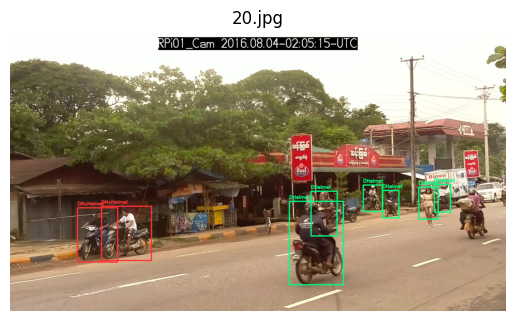

In [ ]:
# Plot a sample training image with annotations
if train_image_annotation_map:
    sample_image_path = list(train_image_annotation_map.keys())[0]
    sample_annotation_path = train_image_annotation_map[sample_image_path]
    print("Plotting sample training image with annotations:")
    plot_image_with_annotations(sample_image_path, sample_annotation_path)
else:
    print("No training images found in the map to plot.")

Plotting another sample training image with annotations:


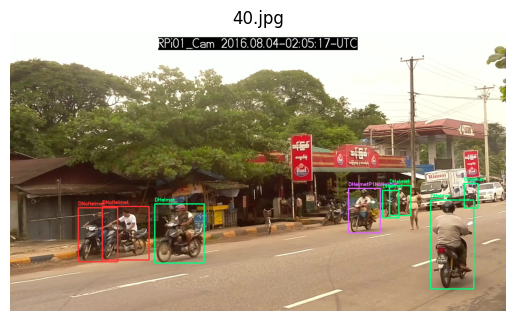

In [ ]:
# Plot another sample training image with annotations
if len(train_image_annotation_map) > 1:
    # Select a different sample image path (e.g., the second one in the list)
    sample_image_path = list(train_image_annotation_map.keys())[1]
    sample_annotation_path = train_image_annotation_map[sample_image_path]
    print("Plotting another sample training image with annotations:")
    plot_image_with_annotations(sample_image_path, sample_annotation_path)
elif train_image_annotation_map:
    print("Only one training image available in the map. Plotting the first one again.")
    sample_image_path = list(train_image_annotation_map.keys())[0]
    sample_annotation_path = train_image_annotation_map[sample_image_path]
    plot_image_with_annotations(sample_image_path, sample_annotation_path)
else:
    print("No training images found in the map to plot.")

# Model Training

## Define and Train SSD Model
### Subtask:
Define the SSD model architecture and set up the training loop.

**Reasoning:** Define a simplified SSD model using a pre-trained backbone and implement the training logic.

In [40]:
import torch
import torch.optim as optim
from torchvision.models.detection import ssd300_vgg16
from torch.utils.data import DataLoader
import time

# ==========================
# 1. Setup Device
# ==========================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

Using device: cuda


In [41]:
label_map = {
    'DHelmet': 1,
    'DNoHelmet': 2,
    'DHelmetP1Helmet': 3,
    'DNoHelmetP1NoHelmet': 4
}
num_classes = len(label_map) + 1

model = ssd300_vgg16(weights=None, weights_backbone="DEFAULT", num_classes=num_classes)

model = model.to(device)

print(next(model.parameters()).device)

# ==========================
# Optimizer
# ==========================
params = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=5e-4)

cuda:0


In [42]:
import os
import pandas as pd
from collections import defaultdict

# Path to preprocessed data (where the data split file was used)
preprocessed_data_path = '/content/drive/My Drive/dataset/preprocessed_data/ssd_annotations/'

# Load the training and validation data from the respective directories
train_annotations_dir = os.path.join(preprocessed_data_path, 'train')
val_annotations_dir = os.path.join(preprocessed_data_path, 'val')
test_annotations_dir = os.path.join(preprocessed_data_path, 'test')

# Function to load annotations from a directory
def load_ssd_annotations_from_dir(directory):
    annotations_dict = {}
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                # Construct the full path to the annotation file
                annotation_file_path = os.path.join(root, file)

                # Construct the corresponding image path by replacing the base directory and extension
                relative_path = os.path.relpath(annotation_file_path, directory)
                image_path = os.path.join('/content/drive/My Drive/dataset/extracted_images', relative_path).replace('.txt', '.jpg')

                annotations = []
                with open(annotation_file_path, 'r') as f:
                    for line in f:
                        annotations.append(line.strip())
                annotations_dict[image_path] = annotations
    return annotations_dict

# Build the SSD annotation dictionaries for each split
ssd_annotations_train = load_ssd_annotations_from_dir(train_annotations_dir)
ssd_annotations_val = load_ssd_annotations_from_dir(val_annotations_dir)
ssd_annotations_test = load_ssd_annotations_from_dir(test_annotations_dir)


print(f"SSD annotations for {len(ssd_annotations_train)} training images.")
print(f"SSD annotations for {len(ssd_annotations_val)} validation images.")
print(f"SSD annotations for {len(ssd_annotations_test)} testing images.")

try:
    with open('/content/drive/My Drive/dataset/preprocessed_data/preprocessed_data_description.txt', 'r') as f:
        data_description = f.read()
        print("\nData Description:")
        print(data_description)
except FileNotFoundError:
    print("\nData description file not found.")

SSD annotations for 973 training images.
SSD annotations for 136 validation images.
SSD annotations for 275 testing images.

Data Description:

Dataset: HELMET Dataset

Original Data Locations (Downloaded from Kaggle):
- Base Dataset Path: /root/.cache/kagglehub/datasets/kronomy/helmet-dataset-by-osf-lite/versions/1/helmet-dataset (This is the local path where the dataset was downloaded by kagglehub)
- Annotation Files (CSV): /root/.cache/kagglehub/datasets/kronomy/helmet-dataset-by-osf-lite/versions/1/helmet-dataset/annotation/annotation
- Data Split File (CSV): /root/.cache/kagglehub/datasets/kronomy/helmet-dataset-by-osf-lite/versions/1/helmet-dataset/data_split.csv (Note: This file was used for initial understanding, but a custom split was applied.)

Preprocessed Data Output Locations (Saved to Google Drive):
- Base Save Directory: /content/drive/My Drive/dataset/preprocessed_data
- YOLO Annotations: /content/drive/My Drive/dataset/preprocessed_data/yolo_annotations (Saved as text 

In [20]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 23.6 MB/s eta 0:00:00


In [43]:
from torchmetrics.detection.mean_ap import MeanAveragePrecision

metric = MeanAveragePrecision().to(device)

## Train and Evaluate SSD Model

In [44]:
def compute_iou(box1, box2):
    """Compute IoU between two boxes (x1, y1, x2, y2)."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    inter_area = max(0, x2 - x1) * max(0, y2 - y1)

    box1_area = max(0, (box1[2] - box1[0])) * max(0, (box1[3] - box1[1]))
    box2_area = max(0, (box2[2] - box2[0])) * max(0, (box2[3] - box2[1]))

    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area if union_area > 0 else 0


def confusion_matrix_from_outputs(all_outputs, all_targets, iou_threshold=0.5, score_threshold=0.5):
    """
    Computes TP, FP, FN, TN for object detection over all batches.
    """
    TP, FP, FN, TN = 0, 0, 0, 0

    for outputs, targets in zip(all_outputs, all_targets):
        pred_boxes = outputs["boxes"]
        pred_labels = outputs["labels"]
        pred_scores = outputs["scores"]

        gt_boxes = targets["boxes"]
        gt_labels = targets["labels"]

        # Filter predictions by score threshold
        keep = pred_scores >= score_threshold
        pred_boxes = pred_boxes[keep]
        pred_labels = pred_labels[keep]

        matched_gt = set()

        # Match predictions to GTs
        for pb, pl in zip(pred_boxes, pred_labels):
            best_iou = 0
            best_gt_idx = -1
            for j, (gb, gl) in enumerate(zip(gt_boxes, gt_labels)):
                iou = compute_iou(pb.numpy(), gb.numpy())
                if iou > best_iou:
                    best_iou = iou
                    best_gt_idx = j

            if best_iou >= iou_threshold and pl == gt_labels[best_gt_idx] and best_gt_idx not in matched_gt:
                TP += 1
                matched_gt.add(best_gt_idx)
            else:
                FP += 1

        # Ground truths not matched → FN
        FN += len(gt_boxes) - len(matched_gt)

        # For TN: in detection tasks, usually it's undefined (because background is huge),
        # but if you really want TN, you can define it as "images with no detections and no GT".
        if len(gt_boxes) == 0 and len(pred_boxes) == 0:
            TN += 1

    return TP, FP, FN, TN

In [45]:
def evaluate(model, val_loader, device):
    model.eval()
    metric = MeanAveragePrecision().to(device)

    with torch.no_grad():
        for images, targets in val_loader:
            images = [img.to(device) for img in images]
            outputs = model(images)

            formatted_targets = []
            for t in targets:
                if t["boxes"].numel() > 0:  # check if any boxes exist
                    formatted_targets.append({
                        "boxes": (t["boxes"]).to(device),  # scale to model input
                        "labels": t["labels"].long().to(device)
                    })
                else:
                    formatted_targets.append({
                        "boxes": torch.empty((0, 4), dtype=torch.float32).to(device),
                        "labels": torch.empty((0,), dtype=torch.int64).to(device)
                    })

            metric.update(outputs, formatted_targets)

    return metric.compute()

In [ ]:
# ==========================
# Training Loop
# ==========================
num_epochs = 10
best_map = 0.0
best_epoch = -1
history = {
    "train_loss": [],
    "precision": [],
    "recall": [],
    "val_map": [],
    "val_mar": []
}

for epoch in range(num_epochs):
    print(f"\nStarting Epoch {epoch+1}/{num_epochs}...")
    model.train()
    total_loss = 0.0
    all_outputs = []
    all_targets = []
    start_time = time.time()

    for images, targets in ssd_train_loader:
        # images -> list of tensors
        images = list(img.to(device) for img in images)

        # targets -> list of dicts with "boxes" and "labels"
        formatted_targets = []
        for t in targets:
            if t["boxes"].numel() > 0:
                # Ensure bounding box coordinates are in absolute pixel values for the model input
                boxes = t["boxes"].to(device)
                labels = t["labels"].long().to(device)

                formatted_targets.append({"boxes": boxes, "labels": labels})

        # Forward + Loss
        loss_dict = model(images, formatted_targets)
        losses = sum(loss for loss in loss_dict.values())

        # Backprop
        optimizer.zero_grad()
        losses.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
        optimizer.step()

        total_loss += losses.item()

        # Save outputs and targets for Precision/Recall/F1
        model.eval()
        with torch.no_grad():
            outputs = model(images)
            for out, tgt in zip(outputs, formatted_targets):
                all_outputs.append({
                    "boxes": out["boxes"].cpu(),
                    "labels": out["labels"].cpu(),
                    "scores": out["scores"].cpu()
                })
                all_targets.append({
                    "boxes": tgt["boxes"].cpu(),
                    "labels": tgt["labels"].cpu()
                })
        model.train()

    # ------------------
    # Epoch Metrics
    # ------------------
    epoch_time = time.time() - start_time
    avg_loss = total_loss / len(ssd_train_loader)

    # Compute Precision, Recall, F1
    TP, FP, FN, TN = confusion_matrix_from_outputs(all_outputs, all_targets)

    precision = TP / (TP + FP + 1e-6)
    recall = TP / (TP + FN + 1e-6)

    # ------------------
    # Validation Metrics
    # ------------------
    results = evaluate(model, ssd_val_loader, device)
    map_ = results["map"].item()
    mar = results["mar_100"].item()

    print(f"Epoch [{epoch+1}/{num_epochs}] | Loss: {avg_loss:.4f} | "
          f"Precision: {precision:.4f} | Recall: {recall:.4f} | "
          f"mAP: {map_:.4f}")

    # Save metrics to history
    history["train_loss"].append(avg_loss)
    history["precision"].append(precision)
    history["recall"].append(recall)
    history["val_map"].append(map_)
    history["val_mar"].append(mar)

    # Track the best epoch
    if map_ > best_map:
        best_map = map_
        best_epoch = epoch + 1

print("\nTraining complete ✅")
print(f"Best mAP@[0.5:0.95]: {best_map:.3f} (Epoch {best_epoch})")
print(f"Final Epoch mAP@[0.5:0.95]: {history['val_map'][-1]:.3f}")

print("\nAverage metrics across all epochs:")
print(f"Avg Train Loss: {sum(history['train_loss']) / num_epochs:.4f}")
print(f"Avg Precision: {sum(history['precision']) / num_epochs:.4f}")
print(f"Avg Recall: {sum(history['recall']) / num_epochs:.4f}")
print(f"Avg Val mAP: {sum(history['val_map']) / num_epochs:.4f}")
print(f"Avg Val mAR: {sum(history['val_mar']) / num_epochs:.4f}")


Starting Epoch 1/10...
Epoch [1/10] | Loss: 93.1368 | Precision: 0.0011 | Recall: 0.0402 | mAP: 0.0039


/usr/local/lib/python3.12/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)



Starting Epoch 2/10...
Epoch [2/10] | Loss: 9.0618 | Precision: 0.0013 | Recall: 0.0560 | mAP: 0.0000

Starting Epoch 3/10...
Epoch [3/10] | Loss: 8.8958 | Precision: 0.0028 | Recall: 0.0467 | mAP: 0.0000

Starting Epoch 4/10...
Epoch [4/10] | Loss: 7.5381 | Precision: 0.0044 | Recall: 0.0172 | mAP: 0.0001

Starting Epoch 5/10...
Epoch [5/10] | Loss: 6.0749 | Precision: 0.0000 | Recall: 0.0000 | mAP: 0.0011

Starting Epoch 6/10...
Epoch [6/10] | Loss: 5.9409 | Precision: 0.0000 | Recall: 0.0000 | mAP: 0.0004

Starting Epoch 7/10...
Epoch [7/10] | Loss: 5.7781 | Precision: 0.0000 | Recall: 0.0000 | mAP: 0.0014

Starting Epoch 8/10...
Epoch [8/10] | Loss: 5.6305 | Precision: 0.0000 | Recall: 0.0000 | mAP: 0.0068

Starting Epoch 9/10...
Epoch [9/10] | Loss: 5.4856 | Precision: 0.0000 | Recall: 0.0000 | mAP: 0.0122

Starting Epoch 10/10...
Epoch [10/10] | Loss: 5.3465 | Precision: 0.0000 | Recall: 0.0000 | mAP: 0.0395

Training complete ✅
Best mAP@[0.5:0.95]: 0.039 (Epoch 9)
Final Epoch m

In [46]:
# ==========================
# Training Loop
# ==========================
num_epochs = 5
best_map = 0.0
best_epoch = -1
history = {
    "train_loss": [],
    "precision": [],
    "recall": [],
    "val_map": [],
    "val_mar": []
}

for epoch in range(num_epochs):
    print(f"\nStarting Epoch {epoch+1}/{num_epochs}...")
    model.train()
    total_loss = 0.0
    all_outputs = []
    all_targets = []
    start_time = time.time()

    for images, targets in ssd_train_loader:
        # images -> list of tensors
        images = list(img.to(device) for img in images)

        # targets -> list of dicts with "boxes" and "labels"
        formatted_targets = []
        for t in targets:
            if t["boxes"].numel() > 0:
                # Ensure bounding box coordinates are in absolute pixel values for the model input
                boxes = t["boxes"].to(device)
                labels = t["labels"].long().to(device)

                formatted_targets.append({"boxes": boxes, "labels": labels})

        # Forward + Loss
        loss_dict = model(images, formatted_targets)
        losses = sum(loss for loss in loss_dict.values())

        # Backprop
        optimizer.zero_grad()
        losses.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
        optimizer.step()

        total_loss += losses.item()

        # Save outputs and targets for Precision/Recall/F1
        model.eval()
        with torch.no_grad():
            outputs = model(images)
            for out, tgt in zip(outputs, formatted_targets):
                all_outputs.append({
                    "boxes": out["boxes"].cpu(),
                    "labels": out["labels"].cpu(),
                    "scores": out["scores"].cpu()
                })
                all_targets.append({
                    "boxes": tgt["boxes"].cpu(),
                    "labels": tgt["labels"].cpu()
                })
        model.train()

    # ------------------
    # Epoch Metrics
    # ------------------
    epoch_time = time.time() - start_time
    avg_loss = total_loss / len(ssd_train_loader)

    # Compute Precision, Recall, F1
    TP, FP, FN, TN = confusion_matrix_from_outputs(all_outputs, all_targets)

    precision = TP / (TP + FP + 1e-6)
    recall = TP / (TP + FN + 1e-6)

    # ------------------
    # Validation Metrics
    # ------------------
    results = evaluate(model, ssd_val_loader, device)
    map_ = results["map"].item()
    mar = results["mar_100"].item()

    print(f"Epoch [{epoch+1}/{num_epochs}] | Loss: {avg_loss:.4f} | "
          f"Precision: {precision:.4f} | Recall: {recall:.4f} | "
          f"mAP: {map_:.4f}")

    # Save metrics to history
    history["train_loss"].append(avg_loss)
    history["precision"].append(precision)
    history["recall"].append(recall)
    history["val_map"].append(map_)
    history["val_mar"].append(mar)

    # Track the best epoch
    if map_ > best_map:
        best_map = map_
        best_epoch = epoch + 1

print("\nTraining complete ✅")
print(f"Best mAP@[0.5:0.95]: {best_map:.3f} (Epoch {best_epoch})")
print(f"Final Epoch mAP@[0.5:0.95]: {history['val_map'][-1]:.3f}")

print("\nAverage metrics across all epochs:")
print(f"Avg Train Loss: {sum(history['train_loss']) / num_epochs:.4f}")
print(f"Avg Precision: {sum(history['precision']) / num_epochs:.4f}")
print(f"Avg Recall: {sum(history['recall']) / num_epochs:.4f}")
print(f"Avg Val mAP: {sum(history['val_map']) / num_epochs:.4f}")
print(f"Avg Val mAR: {sum(history['val_mar']) / num_epochs:.4f}")


Starting Epoch 1/5...
Epoch [1/5] | Loss: 79.5526 | Precision: 0.0009 | Recall: 0.0308 | mAP: 0.0000

Starting Epoch 2/5...
Epoch [2/5] | Loss: 9.5905 | Precision: 0.0026 | Recall: 0.0743 | mAP: 0.0000

Starting Epoch 3/5...
Epoch [3/5] | Loss: 9.0157 | Precision: 0.0033 | Recall: 0.0349 | mAP: 0.0001

Starting Epoch 4/5...
Epoch [4/5] | Loss: 7.8813 | Precision: 0.0055 | Recall: 0.0201 | mAP: 0.0108

Starting Epoch 5/5...
Epoch [5/5] | Loss: 6.5503 | Precision: 0.0000 | Recall: 0.0000 | mAP: 0.0029

Training complete ✅
Best mAP@[0.5:0.95]: 0.011 (Epoch 4)
Final Epoch mAP@[0.5:0.95]: 0.003

Average metrics across all epochs:
Avg Train Loss: 22.5181
Avg Precision: 0.0025
Avg Recall: 0.0320
Avg Val mAP: 0.0028
Avg Val mAR: 0.0391


## Test SSD Model
### Subtask:
Evaluate the trained SSD model on the validation set.

In [47]:
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import torch
from collections import Counter

# Put model in eval mode
model.eval()

# Define metric object
metric = MeanAveragePrecision().to(device)

# Track counts for precision/recall/accuracy
tp, fp, fn, total = 0, 0, 0, 0

all_confidences = []

with torch.no_grad():
    for images, targets in ssd_test_loader:
        images = [img.to(device) for img in images]
        outputs = model(images)

        # Format targets for metric
        formatted_targets = []
        for t in targets:
            if t["boxes"].numel() > 0:
                boxes = t["boxes"].to(device)
                labels = t["labels"].long().to(device)

                formatted_targets.append({"boxes": boxes, "labels": labels})

        # Update global metric with the whole batch
        metric.update(outputs, formatted_targets)

        # -------- Compute precision/recall/accuracy ----------
        for preds, gts in zip(outputs, formatted_targets):
            pred_labels = preds["labels"].cpu()
            pred_scores = preds["scores"].cpu().numpy()
            gt_labels = gts["labels"].cpu()
            total += len(gt_labels)

            # Save confidences
            all_confidences.extend(pred_scores.tolist())

            # Count matches
            pred_count = Counter(pred_labels.numpy())
            gt_count = Counter(gt_labels.numpy())

            for cls, n_gt in gt_count.items():
                n_pred = pred_count.get(cls, 0)
                tp += min(n_pred, n_gt)
                fp += max(0, n_pred - n_gt)
                fn += max(0, n_gt - n_pred)

# Final mAP results
results = metric.compute()

# Compute PRF and accuracy
precision = tp / (tp + fp + 1e-6)
recall = tp / (tp + fn + 1e-6)
f1 = 2 * (precision * recall) / (precision + recall + 1e-6)

# Compute confidence statistics
avg_conf = np.mean(all_confidences) if all_confidences else 0
max_conf = np.max(all_confidences) if all_confidences else 0
min_conf = np.min(all_confidences) if all_confidences else 0

print("📊 Overall Test Set Evaluation:")
print(f"mAP@[0.5:0.95]: {results['map']:.4f}")
print(f"mAR@100: {results['mar_100']:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Confidence → Avg: {avg_conf:.4f}, Min: {min_conf:.4f}, Max: {max_conf:.4f}")

📊 Overall Test Set Evaluation:
mAP@[0.5:0.95]: 0.0053
mAR@100: 0.1019
Precision: 0.0257, Recall: 0.9989, F1-score: 0.0502
Confidence → Avg: 0.1373, Min: 0.0878, Max: 0.3876


In [48]:
# Save the trained model
import torch
import os

# Define the path to save the model
model_save_path = '/content/drive/My Drive/dataset/trained_ssd_model_5_epoch.pth'

# Ensure the directory exists
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Save the model's state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Trained SSD model saved to: {model_save_path}")

Trained SSD model saved to: /content/drive/My Drive/dataset/trained_ssd_model_5_epoch.pth


In [50]:
# Save the trained model
import torch
import os
from torchvision.models.detection import ssd300_vgg16 # Import the SSD model

# Define the path to load the model
model_load_path = '/content/drive/MyDrive/Tan Ja Man RSW G10/Y3S1/Image Processing/Assignment/SSD/trained_ssd_model_5_epoch.pth'

# Define the number of classes (including background) - make sure this matches the training setup
num_classes = 5 # Assuming 4 classes + background

# Create a new instance of the model
model = ssd300_vgg16(weights=None, weights_backbone=None, num_classes=num_classes)

# Load the saved state dictionary
if os.path.exists(model_load_path):
    model.load_state_dict(torch.load(model_load_path))
    print(f"Trained SSD model loaded from: {model_load_path}")
else:
    print(f"Error: Trained model not found at: {model_load_path}")

# You can now use the 'model' for inference or further evaluation.
# For example, set it to evaluation mode:
model.eval()

# To get the exact version, you can check the torchvision version
import torchvision
print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")

Trained SSD model loaded from: /content/drive/MyDrive/Tan Ja Man RSW G10/Y3S1/Image Processing/Assignment/SSD/trained_ssd_model_5_epoch.pth
PyTorch version: 2.8.0+cu126
Torchvision version: 0.23.0+cu126


# Object Detection

## Load and Detect using trained model

In [51]:
import torch
import torch.optim as optim
import time

# ==========================
# 1. Setup Device
# ==========================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)


Using device: cuda


In [52]:
import cv2
import matplotlib.pyplot as plt
from torchvision.transforms import functional as F
from torchvision.models.detection import ssd300_vgg16
import numpy as np
import os

# 1) Load the saved model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Define the number of classes (including background) - make sure this matches the training setup
num_classes = 5 # Assuming 4 classes + background

# Create a new instance of the model
model = ssd300_vgg16(weights=None, weights_backbone=None, num_classes=num_classes)

# Define the path to load the model
model_load_path = '/content/drive/MyDrive/Tan Ja Man RSW G10/Y3S1/Image Processing/Assignment/SSD/trained_ssd_model_5_epoch.pth'

# Load the saved state dictionary
if os.path.exists(model_load_path):
    model.load_state_dict(torch.load(model_load_path, map_location=device))
    print(f"Trained SSD model loaded from: {model_load_path}")
else:
    print(f"Error: Trained model not found at: {model_load_path}")
    # Handle the error appropriately, maybe exit or raise an exception
    exit() # Exit if model is not found

# Move the loaded model to the appropriate device (CPU or GPU).
model.to(device)

Using device: cuda
Trained SSD model loaded from: /content/drive/MyDrive/Tan Ja Man RSW G10/Y3S1/Image Processing/Assignment/SSD/trained_ssd_model_5_epoch.pth


SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

/usr/local/lib/python3.12/dist-packages/albumentations/core/composition.py:331: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()


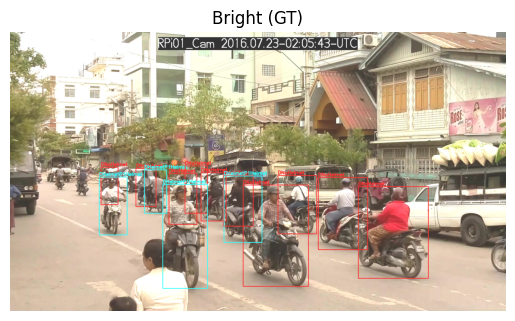

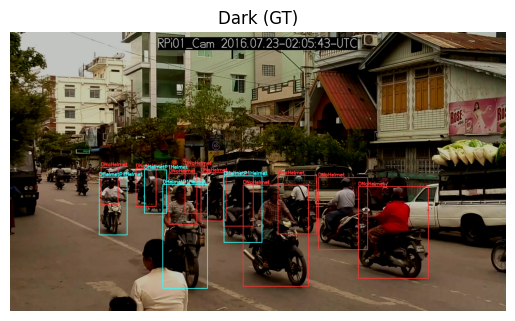

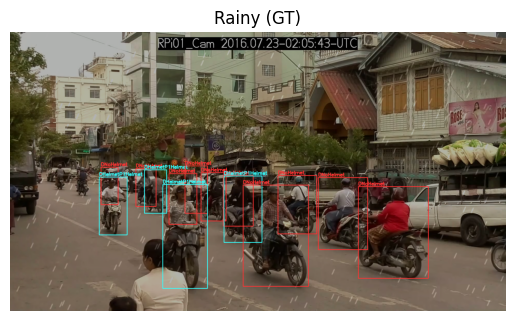

In [53]:
import albumentations as A
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import torch
from torchvision import transforms

# =========================
# Class Maps
# =========================
id2class_map = {
    '1': 'DHelmet',
    '2': 'DNoHelmet',
    '3': 'DHelmetP1Helmet',
    '4': 'DNoHelmetP1NoHelmet',
}

class2color_map = {
    'DHelmet': (0,255,128),
    'DNoHelmet': (255,51,51),
    'DHelmetP1Helmet': (51,255,255),
    'DNoHelmetP1NoHelmet': (224,102,255),
}

# =========================
# Helper Functions
# =========================
def load_image_from_path(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Could not load {image_path}")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def plot_augmented_image(augmented_img, augmented_bboxes_pascal, augmented_class_labels, title):
    """ Draw augmented GT annotations (Pascal VOC pixel coords) """
    img_to_plot = augmented_img.copy()
    for bbox, class_id in zip(augmented_bboxes_pascal, augmented_class_labels):
        label_key = str(int(class_id) + 1)
        label = id2class_map[label_key]
        color = class2color_map[label]
        x_min, y_min, x_max, y_max = map(int, bbox)
        cv2.rectangle(img_to_plot, (x_min,y_min), (x_max,y_max), color, 2)
        cv2.putText(img_to_plot, label, (x_min, y_min-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    plt.imshow(img_to_plot)
    plt.title(title)
    plt.axis("off")
    plt.show()

# =========================
# Augmentation Pipelines
# =========================
too_bright_aug = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=(0.2,0.2), contrast_limit=0, p=1.0),
], bbox_params=A.BboxParams(format="pascal_voc", label_fields=["class_labels"]))

too_dark_aug = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=(-0.23,-0.23), contrast_limit=0, p=1.0),
], bbox_params=A.BboxParams(format="pascal_voc", label_fields=["class_labels"]))

rainy_aug = A.Compose([
    A.RandomRain(blur_value=5, drop_length=20, drop_width=1, drop_color=(200,200,200), p=1.0),
], bbox_params=A.BboxParams(format="pascal_voc", label_fields=["class_labels"]))

# =========================
# Example Usage
# =========================
sample_image_path = '/content/drive/My Drive/dataset/data/yolo_train/test/Mandalay_1_128/60.jpg'
sample_annotation_path = '/content/drive/My Drive/dataset/preprocessed_data/ssd_annotations/test/Mandalay_1_128/60.txt'

# Load original image + YOLO annotation
img = load_image_from_path(sample_image_path)
h,w,_ = img.shape
with open(sample_annotation_path) as f:
    lines = f.readlines()

orig_boxes_pascal, orig_labels = [], []
for line in lines:
    cid, x_min, y_min, x_max, y_max = map(float, line.split())
    orig_boxes_pascal.append([x_min, y_min, x_max, y_max])
    orig_labels.append(int(cid))

# Apply augmentations
for aug, title in [(too_bright_aug, "Bright"), (too_dark_aug, "Dark"), (rainy_aug, "Rainy")]:
    augmented = aug(image=img, bboxes=orig_boxes_pascal, class_labels=orig_labels)
    aug_img, aug_boxes, aug_labels = augmented["image"], augmented["bboxes"], augmented["class_labels"]

    # Show GT annotations
    plot_augmented_image(aug_img, aug_boxes, aug_labels, f"{title} (GT)")

Found 4 augmented images.

Processing original_image.jpg


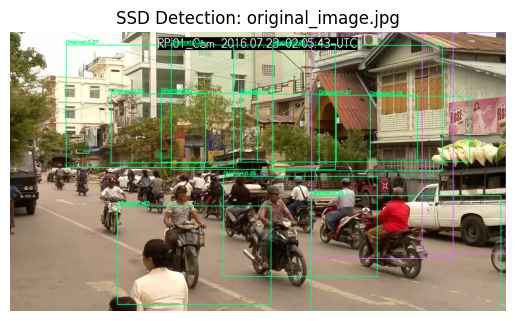


Detection Metrics:
  Precision: 0.3077
  Recall:    0.2857
  F1-score:  0.2963

Processing bright_weather.jpg


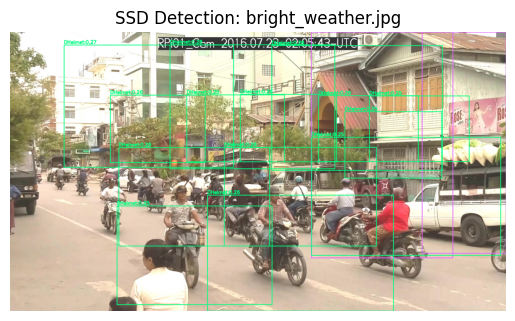


Detection Metrics:
  Precision: 0.2500
  Recall:    0.2857
  F1-score:  0.2667

Processing dark_weather.jpg


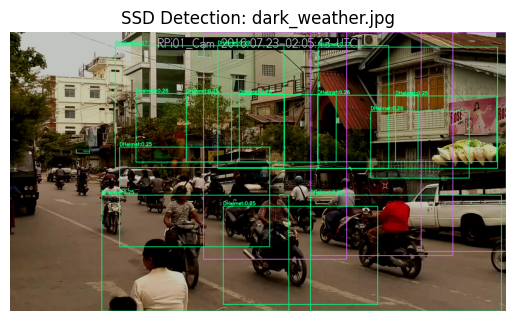


Detection Metrics:
  Precision: 0.2500
  Recall:    0.2857
  F1-score:  0.2667

Processing rainy_weather.jpg


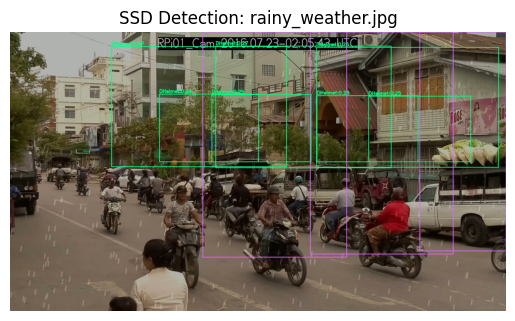


Detection Metrics:
  Precision: 0.4000
  Recall:    0.2857
  F1-score:  0.3333


In [57]:
import os
import cv2
import torch
from matplotlib import pyplot as plt
from collections import Counter
from torchvision import transforms

# --- Metric calculation ---
def compute_detection_metrics(gt_boxes, gt_labels, pred_boxes, pred_labels, iou_thresh=0):
    matched_gt = set()
    tp, fp = 0, 0

    for p_box, p_label in zip(pred_boxes, pred_labels):
        found_match = False
        for i, (gt_box, gt_label) in enumerate(zip(gt_boxes, gt_labels)):
            if i in matched_gt:
                continue
            if p_label == gt_label:
                # Compute IoU
                xA = max(p_box[0], gt_box[0])
                yA = max(p_box[1], gt_box[1])
                xB = min(p_box[2], gt_box[2])
                yB = min(p_box[3], gt_box[3])
                interArea = max(0, xB - xA) * max(0, yB - yA)
                boxAArea = (p_box[2] - p_box[0]) * (p_box[3] - p_box[1])
                boxBArea = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
                iou = interArea / float(boxAArea + boxBArea - interArea + 1e-6)
                if iou >= iou_thresh:
                    tp += 1
                    matched_gt.add(i)
                    found_match = True
                    break
        if not found_match:
            fp += 1

    fn = len(gt_boxes) - len(matched_gt)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print("\nDetection Metrics:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")

# --- Load YOLO annotation ---
def get_bbox_and_label_from_path(annotation_path, image_shape):
    h, w = image_shape[:2]
    boxes, labels = [], []
    with open(annotation_path) as f:
        for line in f.readlines():
            cid, x_min, y_min, x_max, y_max = map(float, line.split())
            boxes.append([x_min, y_min, x_max, y_max])
            labels.append(int(cid))
    return boxes, labels

# --- Prediction + plotting for SSD ---
def plot_and_predict_image(image_path, model, device, id2class_map=id2class_map, class2color_map=class2color_map, conf_thresh=0.25):
    if not os.path.exists(image_path):
        print(f"Error: {image_path} not found.")
        return []

    # Load image
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr.copy(), cv2.COLOR_BGR2RGB)

    # Preprocess
    transform = transforms.Compose([transforms.ToTensor()])
    img_tensor = transform(img_rgb).unsqueeze(0).to(device)

    # SSD prediction
    model.eval()
    with torch.no_grad():
        outputs = model(img_tensor)

    output = outputs[0]
    boxes = output["boxes"].cpu().numpy()
    scores = output["scores"].cpu().numpy()
    labels = output["labels"].cpu().numpy()

    # Filter low-confidence
    keep = scores > conf_thresh
    boxes, scores, labels = boxes[keep], scores[keep], labels[keep]

    # Map labels
    pred_labels = labels

    label_name = [id2class_map[str(int(l))] for l in labels]

    # Draw predictions
    for box, label, score in zip(boxes, label_name, scores):
        color = class2color_map.get(label, (255, 255, 255))
        x_min, y_min, x_max, y_max = box.astype(int)
        cv2.rectangle(img_rgb, (x_min, y_min), (x_max, y_max), color, 2)
        cv2.putText(img_rgb, f"{label}:{score:.2f}", (x_min, y_min - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    plt.imshow(img_rgb)
    plt.title(f"SSD Detection: {os.path.basename(image_path)}")
    plt.axis("off")
    plt.show()

    return boxes, pred_labels

# --- Setup ---
augmented_samples_dir = '/content/drive/My Drive/dataset/augmented_samples'
augmented_image_files = [f for f in os.listdir(augmented_samples_dir) if f.endswith('.jpg')]

# Load ground truth from original image
sample_original_image_path = '/content/drive/My Drive/dataset/data/yolo_train/test/Mandalay_1_128/60.jpg'
sample_original_annotation_path = '/content/drive/My Drive/dataset/data/yolo_train/test/Mandalay_1_128/60.txt'
img_original = cv2.imread(sample_original_image_path)
gt_boxes, gt_labels = get_bbox_and_label_from_path(sample_original_annotation_path, img_original.shape)

all_classes = list(id2class_map.values())

# Run evaluation
if augmented_image_files:
    print(f"Found {len(augmented_image_files)} augmented images.")
    for image_filename in augmented_image_files:
        print(f"\nProcessing {image_filename}")
        image_path = os.path.join(augmented_samples_dir, image_filename)

        pred_boxes, pred_labels = plot_and_predict_image(image_path, model, device)
        compute_detection_metrics(gt_boxes, gt_labels, pred_boxes, pred_labels)
else:
    print("No augmented images found.")